In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import datetime

In [3]:
# get data from https://github.com/CSSEGISandData/COVID-19, provided by Johns Hopkins University

confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## 1. Global Trends

### 1.1 Latest data update

The data is upated on a daily basis. Lets extract last update data of the data.

In [4]:
latest_date = datetime.datetime(int(confirmed.columns[-1][5:7]),
                  int(confirmed.columns[-1][0]),
                  int(confirmed.columns[-1][2:4])).strftime("%B%d")

print('Data is as of', latest_date)

Data is as of March31


### 1.2 Daily confirmed cases

One of the most important indicators about the outbreak us trend of CONFIRMED cases. 

In [5]:
# get daily confirmed cases
confirmed_daily = confirmed.iloc[:, 4:].sum() 
confirmed_daily = pd.DataFrame({'date':confirmed_daily.index, 'confirmed_count':confirmed_daily.values})
confirmed_daily.date = pd.to_datetime(confirmed_daily.date)

# confirmed case counts higher than 99999
confirmed_daily[confirmed_daily.confirmed_count > 99999] 

,date,confirmed_count
44,2020-03-06,101801
45,2020-03-07,105847
46,2020-03-08,109821
47,2020-03-09,113590
48,2020-03-10,118620
49,2020-03-11,125875
50,2020-03-12,128352
51,2020-03-13,145205
52,2020-03-14,156101
53,2020-03-15,167454


From this data we can see that the number of confimred cases increases exponentially. Below, I will further analyse exponential growth of the confirmed cases for selected countries. For new lets see how long does it take to reach every 100000th confirmed case limit

In [32]:
# time period for every 100000th confirmed case
print(confirmed_daily.date[44] - confirmed_daily.date[0], '    first 100000 cases')
print(confirmed_daily.date[56] - confirmed_daily.date[44], '   + 100000 cases')
print(confirmed_daily.date[59] - confirmed_daily.date[56], '    + 100000 cases')
print(confirmed_daily.date[62] - confirmed_daily.date[59], '    + 100000 cases')
print(confirmed_daily.date[64] - confirmed_daily.date[62], '    + 100000 cases')
print(confirmed_daily.date[66] - confirmed_daily.date[64], '    + 100000 cases')
print(confirmed_daily.date[67] - confirmed_daily.date[66], '    + 100000 cases')
print(confirmed_daily.date[69] - confirmed_daily.date[67], '    + 100000 cases')

44 days 00:00:00     first 100000 cases
12 days 00:00:00    + 100000 cases
3 days 00:00:00     + 100000 cases
3 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
1 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases


As see above there is a disappoing fact that the number of confirmed cases increase very fast - it takes shorter and shorter time period to reach every 100000th confirmed case limit. Let's see it visually.

(array([737446., 737490., 737502., 737505., 737508., 737510., 737512.,
        737513.]), <a list of 8 Text xticklabel objects>)

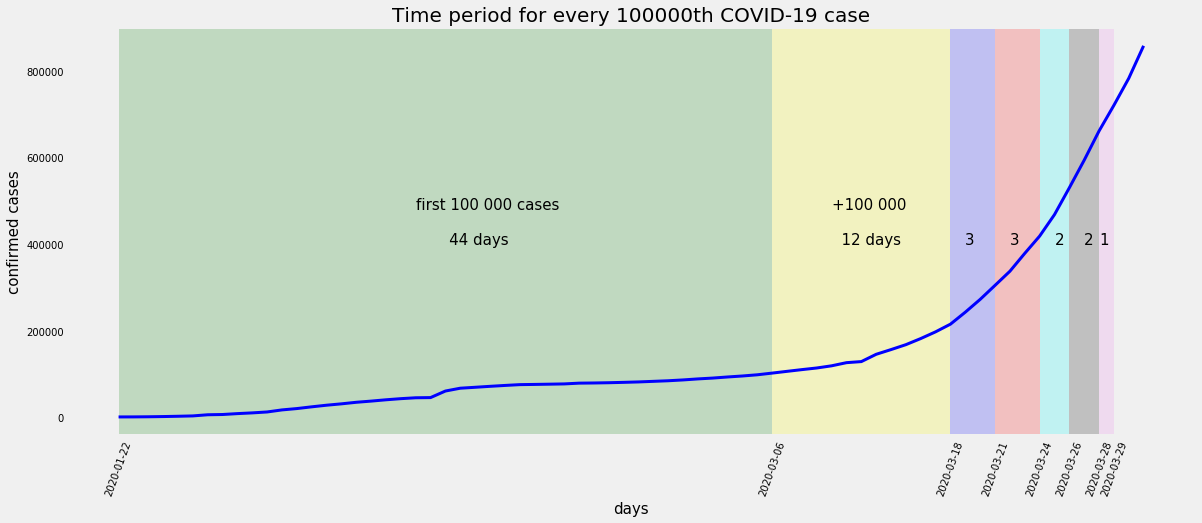

In [21]:
plt.figure(figsize=(18, 7))
plt.plot(confirmed_daily.date, confirmed_daily.confirmed_count, linewidth=3, color='b')
plt.title('Time period for every 100000th COVID-19 case', size=20)
plt.xlabel('days', size=15)
plt.ylabel('confirmed cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
# plt.gca().set_facecolor('w')
plt.grid(False)
plt.axvspan(confirmed_daily.date[0], confirmed_daily.date[44], facecolor='green', alpha=0.2)
plt.text(confirmed_daily.date[20], 400000, 'first 100 000 cases \n\n       44 days', size=15)
plt.axvspan(confirmed_daily.date[44], confirmed_daily.date[56], facecolor='yellow', alpha=0.2)
plt.text(confirmed_daily.date[48], 400000, '+100 000 \n\n  12 days', size=15)
plt.axvspan(confirmed_daily.date[56], confirmed_daily.date[59], facecolor='blue', alpha=0.2)
plt.text(confirmed_daily.date[57], 400000, '3', size=15)
plt.axvspan(confirmed_daily.date[59], confirmed_daily.date[62], facecolor='red', alpha=0.2)
plt.text(confirmed_daily.date[60], 400000, '3', size=15)
plt.axvspan(confirmed_daily.date[62], confirmed_daily.date[64], facecolor='cyan', alpha=0.2)
plt.text(confirmed_daily.date[63], 400000, '2', size=15)
plt.axvspan(confirmed_daily.date[64], confirmed_daily.date[66], facecolor='black', alpha=0.2)
plt.text(confirmed_daily.date[65], 400000, '2', size=15)
plt.axvspan(confirmed_daily.date[66], confirmed_daily.date[67], facecolor='violet', alpha=0.2)
plt.text(confirmed_daily.date[66], 400000, '1', size=15)
plt.xticks([confirmed_daily.date[0], confirmed_daily.date[44], confirmed_daily.date[56], confirmed_daily.date[59],
           confirmed_daily.date[62], confirmed_daily.date[64], confirmed_daily.date[66], confirmed_daily.date[67]])
plt.xticks(rotation=70)

There could be a number of reasons for such an extraordinary growth of confimred cases. For example, an increasing number of tests conducted by countries. The higher the number of tests, the higher the number of positive cases.  

### 1.3 Combining Confirmed, Deaths and Recoveries data

In [8]:
confirmed_latest = confirmed.iloc[:, [1,-1]].groupby('Country/Region').sum()
deaths_latest = deaths.iloc[:, [1,-1]].groupby('Country/Region').sum()
recoveries_latest = recoveries.iloc[:, [1,-1]].groupby('Country/Region').sum()

In [9]:
confirmed_latest

,3/31/20
Country/Region,
Afghanistan,174
Albania,243
Algeria,716
Andorra,376
Angola,7
...,...
Venezuela,135
Vietnam,212
West Bank and Gaza,119


In [33]:
# combine datasets and add Active count
full_df = pd.concat([confirmed_latest, deaths_latest, recoveries_latest], axis=1)
full_df.columns = ['confirmed', 'deaths', 'recoveries']
full_df['active'] = full_df.confirmed - full_df.deaths - full_df.recoveries
full_df.head(11)

,confirmed,deaths,recoveries,active
Country/Region,,,,
Afghanistan,174,4,5,165
Albania,243,15,52,176
Algeria,716,44,46,626
Andorra,376,12,10,354
Angola,7,2,1,4
Antigua and Barbuda,7,0,0,7
Argentina,1054,27,240,787
Armenia,532,3,30,499
Australia,4559,18,358,4183


Lets concentrate on top 15 countries

### Here are top 15 countrues with CONFIRMED cases

In [11]:
full_df.confirmed.sort_values(ascending=False).head(15)

Country/Region
US                188172
Italy             105792
Spain              95923
China              82279
Germany            71808
France             52827
Iran               44605
United Kingdom     25481
Switzerland        16605
Turkey             13531
Belgium            12775
Netherlands        12667
Austria            10180
Korea, South        9786
Canada              8527
Name: confirmed, dtype: int64

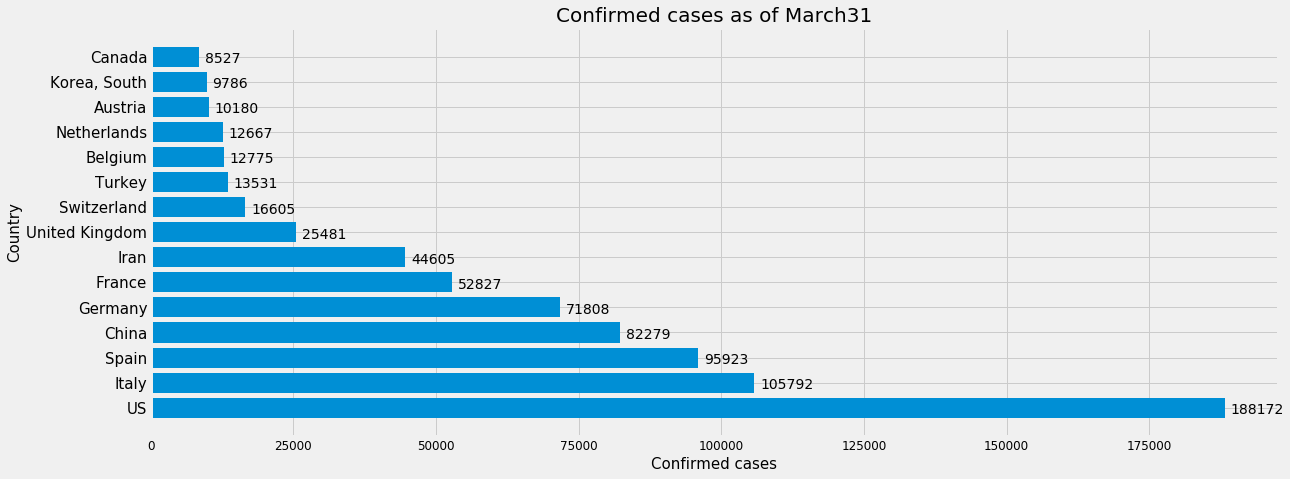

In [31]:
confirmed_top15 = full_df.confirmed.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(confirmed_top15.index, confirmed_top15)
plt.title('Confirmed cases as of ' + latest_date, size=20)
plt.xlabel('Confirmed cases', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(True)
for index, value in enumerate(confirmed_top15):
    plt.text(value + 1000, index - .25, str(value))

US, Italy and Spain are leaders.

### ACTIVE cases

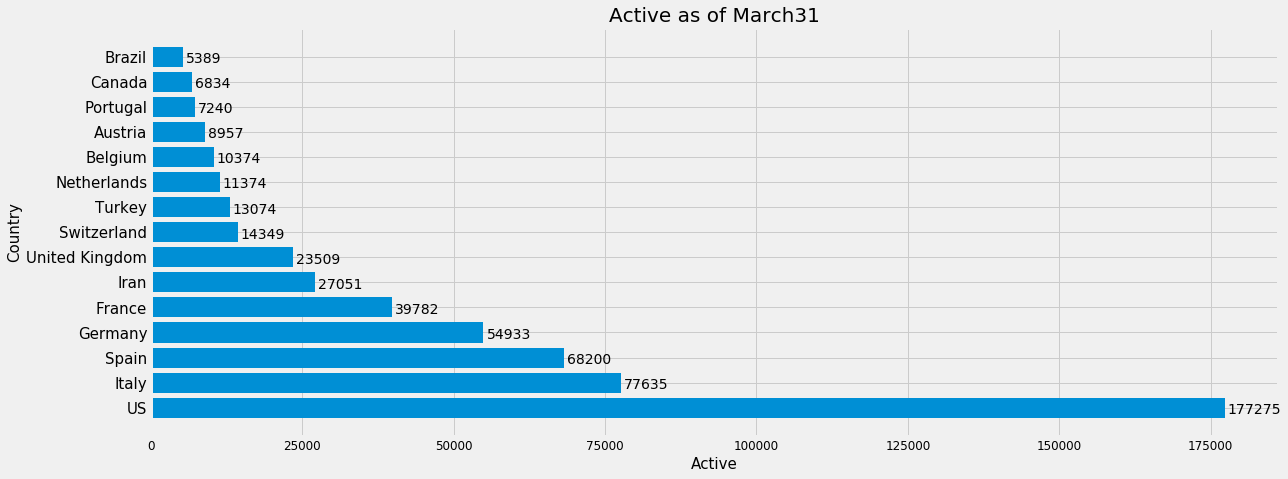

In [19]:
active_top15 = full_df.active.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(active_top15.index, active_top15)
plt.title('Active as of ' + latest_date, size=20)
plt.xlabel('Active', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(True)
for index, value in enumerate(active_top15):
    plt.text(value + 500, index - .25, str(value))

Still US, Italy and Spain lead the countries with Active cases

### DEATHS

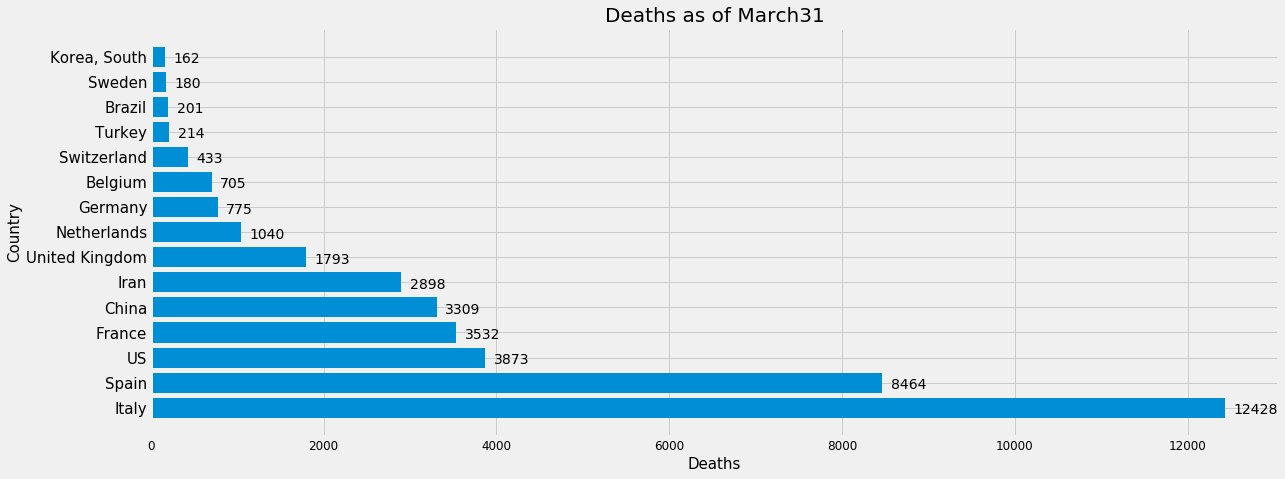

In [18]:
deaths_top15 = full_df.deaths.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(deaths_top15.index, deaths_top15)
plt.title('Deaths as of ' + latest_date, size=20)
plt.xlabel('Deaths', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(True)
for index, value in enumerate(deaths_top15):
    plt.text(value + 100, index - .25, str(value))

Italy has the most number of deaths. One reason for this is the fact that Italy has one of the highly aged populations in the world and most victims of the COVID-19 are people aged over 65. 
In the coming days we can expect US reach Italy, since US has the most confimred cases so far.  

### RECOVERIES

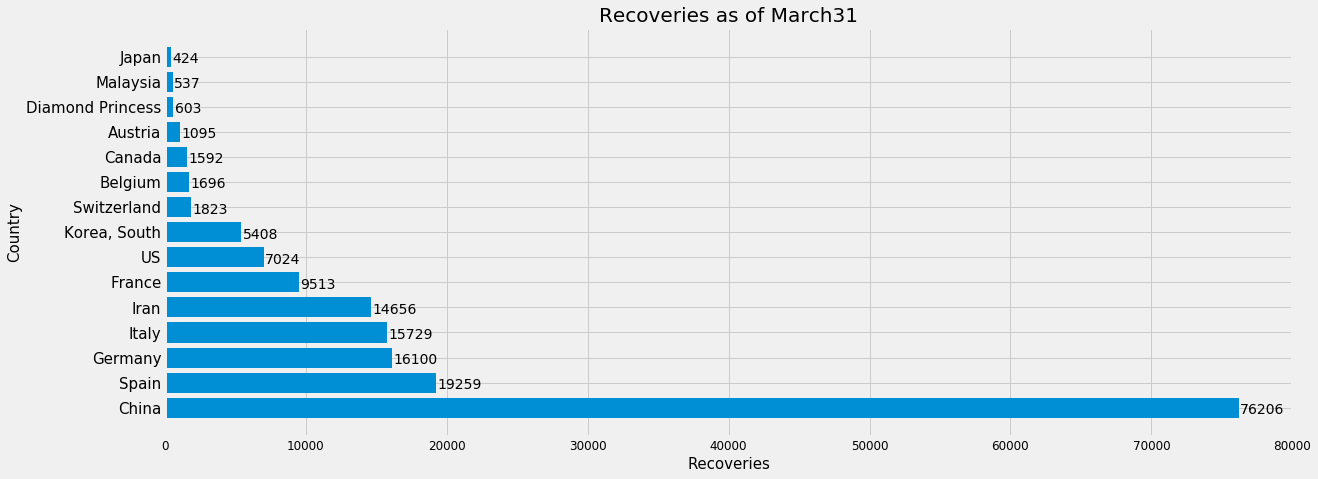

In [15]:
recoveries_top15 = full_df.recoveries.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(recoveries_top15.index, recoveries_top15)
plt.title('Recoveries as of ' + latest_date, size=20)
plt.xlabel('Recoveries', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(True)
for index, value in enumerate(recoveries_top15):
    plt.text(value+100, index - .25, str(value))

China has the most number of revovered people, since it was the first country where virus started to spread and many people have already recovered from the disease. Perphaps this could also be related to the fact that China has realtively younger people (in contrast to Italy).

## 2. Country based analysis

TO BE CONTINUED